In [4]:
import pandas as pd

# Load data
df = pd.read_csv('../data/financial_data.csv')

# Quick analysis
print("Data Summary:")
print(df.groupby(['Type', 'Department'])['Amount'].sum().unstack())

# Create pivot table
report = df.pivot_table(
    index='Department',
    columns='Type',
    values='Amount',
    aggfunc='sum',
    margins=True
)
print("\nFinancial Report by Department:")
print(report)

Data Summary:
Department     Finance          IT   Marketing       Sales     Support
Type                                                                  
Expense     2027746.98  2863741.24  2890588.88  2435799.36  2703723.86
Revenue     2133145.89  2232794.62  2332316.26  2784697.77  2839928.76

Financial Report by Department:
Type            Expense      Revenue          All
Department                                       
Finance      2027746.98   2133145.89   4160892.87
IT           2863741.24   2232794.62   5096535.86
Marketing    2890588.88   2332316.26   5222905.14
Sales        2435799.36   2784697.77   5220497.13
Support      2703723.86   2839928.76   5543652.62
All         12921600.32  12322883.30  25244483.62


In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Prepare monthly data
monthly_data = df.groupby(pd.to_datetime(
    df['Date']).dt.to_period('M'))['Amount'].sum()

# ARIMA Model
model = ARIMA(monthly_data, order=(1, 1, 1))
results = model.fit()

# 3-month forecast
forecast = results.forecast(steps=3)
print("3-Month Forecast:")
print(forecast)

3-Month Forecast:
2025-08    1.007712e+06
2025-09    9.733533e+05
2025-10    9.588584e+05
Freq: M, Name: predicted_mean, dtype: float64


In [6]:
import numpy as np

# Profitability Analysis

df['Profit'] = np.where(df['Type'] == 'Revenue', df['Amount'], -df['Amount'])
profitability = df.groupby('Department')['Profit'].sum().sort_values()

profitability

Department
IT          -630946.62
Marketing   -558272.62
Finance      105398.91
Support      136204.90
Sales        348898.41
Name: Profit, dtype: float64

<Axes: title={'center': 'Monthly Financial Trend'}, xlabel='Date'>

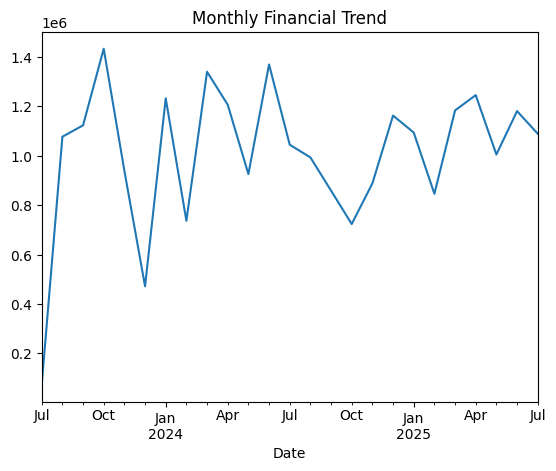

In [7]:

# Time Series Trend

monthly_trend = df.groupby(pd.to_datetime(df['Date']).dt.to_period('M'))['Amount'].sum()
monthly_trend.plot(title='Monthly Financial Trend')

In [8]:

# Top Performers

top_depts = df[df['Type'] == 'Revenue'].groupby('Department')['Amount'].sum().nlargest(3)
top_depts

Department
Support      2839928.76
Sales        2784697.77
Marketing    2332316.26
Name: Amount, dtype: float64

In [9]:

# Anomaly Detection

from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.05)
df['Anomaly'] = model.fit_predict(df[['Amount']])
anomalies = df[df['Anomaly'] == -1]
anomalies

,Date,Amount,Type,Department,Description,Profit,Anomaly
80,2024-04-28 11:51:48.220791,1003.70,Revenue,Sales,Sample transaction 80,1003.70,-1
96,2025-07-13 11:51:48.220873,49243.58,Revenue,IT,Sample transaction 96,49243.58,-1
104,2025-03-11 11:51:48.220913,2832.61,Expense,IT,Sample transaction 104,-2832.61,-1
107,2024-07-01 11:51:48.220928,331.14,Revenue,Sales,Sample transaction 107,331.14,-1
126,2023-08-02 11:51:48.221024,753.41,Expense,IT,Sample transaction 126,-753.41,-1
133,2024-03-12 11:51:48.221060,49844.03,Expense,Marketing,Sample transaction 133,-49844.03,-1
168,2024-03-09 11:51:48.221237,1083.56,Expense,Support,Sample transaction 168,-1083.56,-1
184,2023-10-18 11:51:48.221317,748.80,Revenue,Support,Sample transaction 184,748.80,-1
218,2023-10-29 11:51:48.221489,49221.67,Expense,Marketing,Sample transaction 218,-49221.67,-1
222,2023-09-25 11:51:48.221509,1017.69,Expense,IT,Sample transaction 222,-1017.69,-1


12:18:52 - cmdstanpy - INFO - Chain [1] start processing
12:18:52 - cmdstanpy - INFO - Chain [1] done processing
/home/javad/Desktop/code_root/javad_torabi/BusinessIntelligenceSystem/venv/lib/python3.12/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


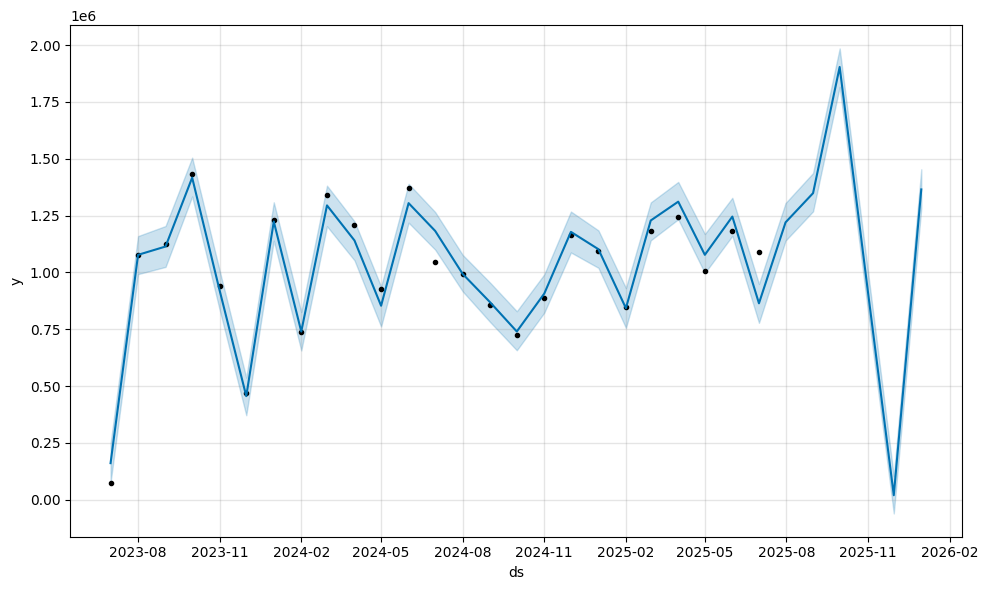

In [11]:
# Financial Forecasting

from prophet import Prophet
import pandas as pd

monthly_trend = df.groupby(pd.to_datetime(df['Date']).dt.to_period('M'))['Amount'].sum()

forecast_data = monthly_trend.reset_index()
forecast_data['Date'] = forecast_data['Date'].dt.to_timestamp()  # این خط مشکل را حل می‌کند
forecast_data.columns = ['ds', 'y']

model = Prophet()
model.fit(forecast_data)

future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

fig = model.plot(forecast)